In [1]:
import sys, time
import math
import numpy as np
from pykern import pkcli
from pykern.pkcollections import PKDict

# The rslaser library may not be installed, so a check is required.
try:
    import rslaser
except:
    # Developers should use 'pip install -e .' from the command line.
    # Users can install directly from GitHub --
    !{sys.executable} -m pip install git+https://github.com/radiasoft/rslaser.git
    import rslaser

from rslaser.pulse import pulse
from rslaser.optics import element
from rslaser.optics import drift
from rslaser.optics import crystal

import scipy.constants as const

import srwlib
from srwlib import srwl

# 2D plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

# reset the notebook style
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

In [2]:
# specify parameters
params = PKDict(
        photon_e_ev=1.5498, # Photon energy [eV], calculated from 800nm wavelength
        nslice = 3,
        nx_slice = 32,
        ny_slice = 32,
)

# instantiate the crystal
crystal_params = PKDict(length = 2.5/100.0,  # [m]
                        nslice = 1,
)

Text(0.5, 1.0, 'wfr 3 abs efield')

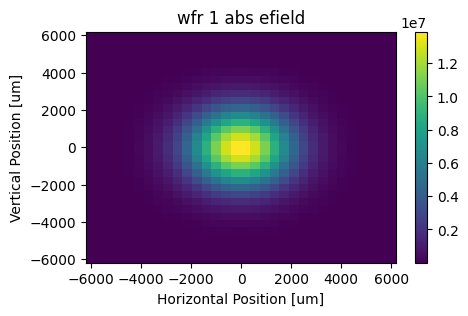

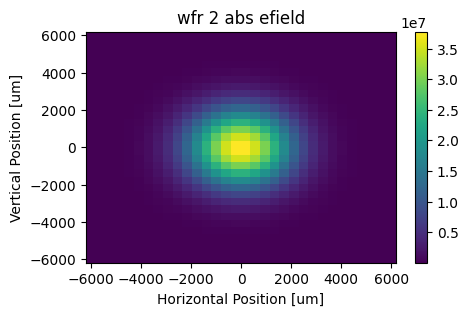

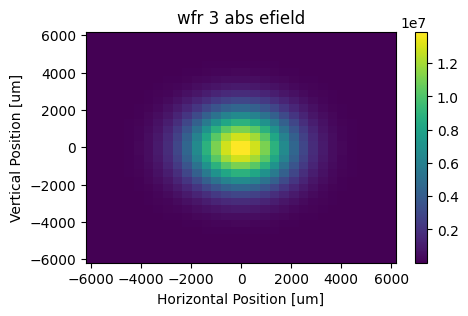

In [3]:
# Initialize laser pulse
thisPulse = pulse.LaserPulse(params)

# Plot wavefront
lp_wfr_x = np.linspace(thisPulse.slice[0].wfr.mesh.xStart,thisPulse.slice[0].wfr.mesh.xFin,thisPulse.slice[0].wfr.mesh.nx)
lp_wfr_y = np.linspace(thisPulse.slice[0].wfr.mesh.yStart,thisPulse.slice[0].wfr.mesh.yFin,thisPulse.slice[0].wfr.mesh.ny)

intensity0 = srwlib.array('f', [0]*thisPulse.slice[0].wfr.mesh.nx*thisPulse.slice[0].wfr.mesh.ny) # "flat" array to take 2D intensity data
srwl.CalcIntFromElecField(intensity0, thisPulse.slice[0].wfr, 0, 0, 3, thisPulse.slice[0].wfr.mesh.eStart, 0, 0) #extracts intensity
intens_2d_0 = np.array(intensity0).reshape((thisPulse.slice[0].wfr.mesh.nx, thisPulse.slice[0].wfr.mesh.ny), order='C') #reshaping
efield_abs_2d_0 = np.sqrt(np.sqrt(const.mu_0 / const.epsilon_0) * 2.0 * intens_2d_0) # [V/m]

fig = plt.figure(figsize=(5,3))
ax = fig.gca()
plt.pcolormesh(lp_wfr_x*1e6, lp_wfr_y*1e6, efield_abs_2d_0, cmap=plt.cm.viridis,shading='auto')#,vmin=0.95,vmax=1.05)
plt.colorbar()
ax.set_ylabel(r'Vertical Position [um]')
ax.set_xlabel(r'Horizontal Position [um]')
ax.set_title('wfr 1 abs efield')

lp_wfr_x = np.linspace(thisPulse.slice[1].wfr.mesh.xStart,thisPulse.slice[1].wfr.mesh.xFin,thisPulse.slice[1].wfr.mesh.nx)
lp_wfr_y = np.linspace(thisPulse.slice[1].wfr.mesh.yStart,thisPulse.slice[1].wfr.mesh.yFin,thisPulse.slice[1].wfr.mesh.ny)

intensity1 = srwlib.array('f', [1]*thisPulse.slice[1].wfr.mesh.nx*thisPulse.slice[1].wfr.mesh.ny) # "flat" array to take 2D intensity data
srwl.CalcIntFromElecField(intensity1, thisPulse.slice[1].wfr, 0, 0, 3, thisPulse.slice[1].wfr.mesh.eStart, 0, 0) #extracts intensity
intens_2d_1 = np.array(intensity1).reshape((thisPulse.slice[1].wfr.mesh.nx, thisPulse.slice[1].wfr.mesh.ny), order='C') #reshaping
efield_abs_2d_1 = np.sqrt(np.sqrt(const.mu_0 / const.epsilon_0) * 2.0 * intens_2d_1) # [V/m]

fig = plt.figure(figsize=(5,3))
ax = fig.gca()
plt.pcolormesh(lp_wfr_x*1e6, lp_wfr_y*1e6, efield_abs_2d_1, cmap=plt.cm.viridis,shading='auto')#,vmin=0.95,vmax=1.05)
plt.colorbar()
ax.set_ylabel(r'Vertical Position [um]')
ax.set_xlabel(r'Horizontal Position [um]')
ax.set_title('wfr 2 abs efield')

lp_wfr_x = np.linspace(thisPulse.slice[2].wfr.mesh.xStart,thisPulse.slice[2].wfr.mesh.xFin,thisPulse.slice[2].wfr.mesh.nx)
lp_wfr_y = np.linspace(thisPulse.slice[2].wfr.mesh.yStart,thisPulse.slice[2].wfr.mesh.yFin,thisPulse.slice[2].wfr.mesh.ny)

intensity3 = srwlib.array('f', [2]*thisPulse.slice[2].wfr.mesh.nx*thisPulse.slice[2].wfr.mesh.ny) # "flat" array to take 2D intensity data
srwl.CalcIntFromElecField(intensity3, thisPulse.slice[2].wfr, 0, 0, 3, thisPulse.slice[2].wfr.mesh.eStart, 0, 0) #extracts intensity
intens_2d_3 = np.array(intensity3).reshape((thisPulse.slice[2].wfr.mesh.nx, thisPulse.slice[2].wfr.mesh.ny), order='C') #reshaping
efield_abs_2d_3 = np.sqrt(np.sqrt(const.mu_0 / const.epsilon_0) * 2.0 * intens_2d_3) # [V/m]

fig = plt.figure(figsize=(5,3))
ax = fig.gca()
plt.pcolormesh(lp_wfr_x*1e6, lp_wfr_y*1e6, efield_abs_2d_3, cmap=plt.cm.viridis,shading='auto')#,vmin=0.95,vmax=1.05)
plt.colorbar()
ax.set_ylabel(r'Vertical Position [um]')
ax.set_xlabel(r'Horizontal Position [um]')
ax.set_title('wfr 3 abs efield')

In [4]:
e_crystal = crystal.Crystal(crystal_params)

# Through crystal (1 slice for now)
thisPulse = e_crystal.propagate(thisPulse, 'gain_test') #'n0n2_srw') #
# Don't work (kernel crash): n0n2_lct,
# Don't work ('CrystalSlice' object has no attribute 'A'): abcd_lct

prop_type = gain_test (n0n2_srw)
n0: 1.75, n2: 1.75
Extracting intensity and saving it to a file ... completed (lasted 0.0 s)
Extracting intensity and saving it to a file ... completed (lasted 0.0 s)
Extracting intensity and saving it to a file ... completed (lasted 0.0 s)
Extracting intensity and saving it to a file ... completed (lasted 0.0 s)
Propagated pulse slice  1  of  3
Extracting intensity and saving it to a file ... completed (lasted 0.0 s)
Extracting intensity and saving it to a file ... completed (lasted 0.0 s)
Extracting intensity and saving it to a file ... completed (lasted 0.0 s)
Extracting intensity and saving it to a file ... completed (lasted 0.0 s)
Propagated pulse slice  2  of  3
Extracting intensity and saving it to a file ... completed (lasted 0.0 s)
Extracting intensity and saving it to a file ... completed (lasted 0.0 s)
Extracting intensity and saving it to a file ... completed (lasted 0.0 s)
Extracting intensity and saving it to a file ... completed (lasted 0

Text(0.5, 1.0, 'wfr 3 abs efield')

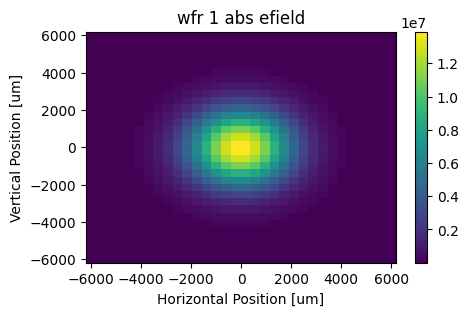

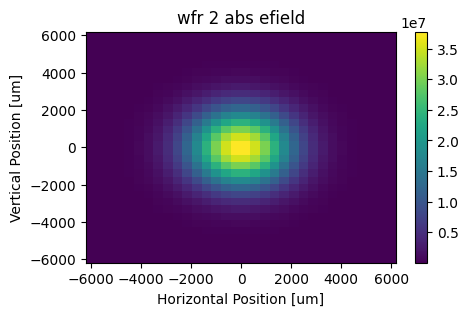

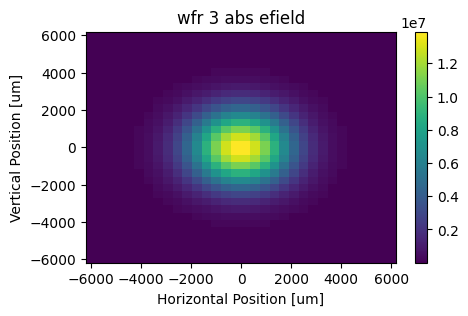

In [5]:
#######################
# Plot wavefront
lp_wfr_x = np.linspace(thisPulse.slice[0].wfr.mesh.xStart,thisPulse.slice[0].wfr.mesh.xFin,thisPulse.slice[0].wfr.mesh.nx)
lp_wfr_y = np.linspace(thisPulse.slice[0].wfr.mesh.yStart,thisPulse.slice[0].wfr.mesh.yFin,thisPulse.slice[0].wfr.mesh.ny)

intensity0 = srwlib.array('f', [0]*thisPulse.slice[0].wfr.mesh.nx*thisPulse.slice[0].wfr.mesh.ny) # "flat" array to take 2D intensity data
srwl.CalcIntFromElecField(intensity0, thisPulse.slice[0].wfr, 0, 0, 3, thisPulse.slice[0].wfr.mesh.eStart, 0, 0) #extracts intensity
intens_2d_0 = np.array(intensity0).reshape((thisPulse.slice[0].wfr.mesh.nx, thisPulse.slice[0].wfr.mesh.ny), order='C') #reshaping
efield_abs_2d_0 = np.sqrt(np.sqrt(const.mu_0 / const.epsilon_0) * 2.0 * intens_2d_0) # [V/m]

fig = plt.figure(figsize=(5,3))
ax = fig.gca()
plt.pcolormesh(lp_wfr_x*1e6, lp_wfr_y*1e6, efield_abs_2d_0, cmap=plt.cm.viridis,shading='auto')#,vmin=0.95,vmax=1.05)
plt.colorbar()
ax.set_ylabel(r'Vertical Position [um]')
ax.set_xlabel(r'Horizontal Position [um]')
ax.set_title('wfr 1 abs efield')

#######################
lp_wfr_x = np.linspace(thisPulse.slice[1].wfr.mesh.xStart,thisPulse.slice[1].wfr.mesh.xFin,thisPulse.slice[1].wfr.mesh.nx)
lp_wfr_y = np.linspace(thisPulse.slice[1].wfr.mesh.yStart,thisPulse.slice[1].wfr.mesh.yFin,thisPulse.slice[1].wfr.mesh.ny)

intensity1 = srwlib.array('f', [1]*thisPulse.slice[1].wfr.mesh.nx*thisPulse.slice[1].wfr.mesh.ny) # "flat" array to take 2D intensity data
srwl.CalcIntFromElecField(intensity1, thisPulse.slice[1].wfr, 0, 0, 3, thisPulse.slice[1].wfr.mesh.eStart, 0, 0) #extracts intensity
intens_2d_1 = np.array(intensity1).reshape((thisPulse.slice[1].wfr.mesh.nx, thisPulse.slice[1].wfr.mesh.ny), order='C') #reshaping
efield_abs_2d_1 = np.sqrt(np.sqrt(const.mu_0 / const.epsilon_0) * 2.0 * intens_2d_1) # [V/m]

fig = plt.figure(figsize=(5,3))
ax = fig.gca()
plt.pcolormesh(lp_wfr_x*1e6, lp_wfr_y*1e6, efield_abs_2d_1, cmap=plt.cm.viridis,shading='auto')#,vmin=0.95,vmax=1.05)
plt.colorbar()
ax.set_ylabel(r'Vertical Position [um]')
ax.set_xlabel(r'Horizontal Position [um]')
ax.set_title('wfr 2 abs efield')

#######################
lp_wfr_x = np.linspace(thisPulse.slice[2].wfr.mesh.xStart,thisPulse.slice[2].wfr.mesh.xFin,thisPulse.slice[2].wfr.mesh.nx)
lp_wfr_y = np.linspace(thisPulse.slice[2].wfr.mesh.yStart,thisPulse.slice[2].wfr.mesh.yFin,thisPulse.slice[2].wfr.mesh.ny)

intensity3 = srwlib.array('f', [2]*thisPulse.slice[2].wfr.mesh.nx*thisPulse.slice[2].wfr.mesh.ny) # "flat" array to take 2D intensity data
srwl.CalcIntFromElecField(intensity3, thisPulse.slice[2].wfr, 0, 0, 3, thisPulse.slice[2].wfr.mesh.eStart, 0, 0) #extracts intensity
intens_2d_3 = np.array(intensity3).reshape((thisPulse.slice[2].wfr.mesh.nx, thisPulse.slice[2].wfr.mesh.ny), order='C') #reshaping
efield_abs_2d_3 = np.sqrt(np.sqrt(const.mu_0 / const.epsilon_0) * 2.0 * intens_2d_3) # [V/m]

fig = plt.figure(figsize=(5,3))
ax = fig.gca()
plt.pcolormesh(lp_wfr_x*1e6, lp_wfr_y*1e6, efield_abs_2d_3, cmap=plt.cm.viridis,shading='auto')#,vmin=0.95,vmax=1.05)
plt.colorbar()
ax.set_ylabel(r'Vertical Position [um]')
ax.set_xlabel(r'Horizontal Position [um]')
ax.set_title('wfr 3 abs efield')

In [6]:
rayleigh_length = np.pi * (thisPulse.sigx_waist)**2.0 / (thisPulse._lambda0)
print('Rayleigh Length: ', round(rayleigh_length,6), ' m')
print('RMS bunch length:', round(thisPulse.sig_s,6), ' m')


Rayleigh Length:  3.926985  m
RMS bunch length: 0.030026  m
